# %% [markdown]

 # LangGraph Student Grade Calculator

 This notebook demonstrates how to use **LangGraph** to build a small state‐based graph
 that calculates a student’s letter grade from a list of scores, and then visualizes
 the graph structure.

# %% [markdown]

 ## 1. Imports

In [ ]:
# %%

from typing import TypedDict, List
from langgraph.graph import StateGraph
from IPython.display import Image, display

# %% [markdown]

 ## 2. Define State Schema

 We define a `TypedDict` to specify exactly what data our graph nodes will read and write.

In [ ]:
# %%

class StudentState(TypedDict):
    """
    State schema defining the data flowing through the graph.
    """
    scores: List[float]      # test scores
    student_name: str        # student full name
    course_name: str         # course title
    grade_report: str        # will be filled in by the node

# %% [markdown]

 ## 3. Node Function: Grade Calculation

 This function computes the average, assigns a letter grade, and writes a formatted report.

In [ ]:
# %%

def calculate_grade(state: StudentState) -> StudentState:
    """
    Processes scores and populates `grade_report` in the state.
    """
    # Compute average
    avg = sum(state["scores"]) / len(state["scores"])
    # Determine letter grade
    if   avg >= 90: letter = "A"
    elif avg >= 80: letter = "B"
    elif avg >= 70: letter = "C"
    elif avg >= 60: letter = "D"
    else:           letter = "F"

    # Build the report
    report = (
        f"Student: {state['student_name']}\n"
        f"Course : {state['course_name']}\n"
        f"Scores : {', '.join(map(str, state['scores']))}\n"
        f"Average: {avg:.2f}%\n"
        f"Final  : {letter}"
    )
    state["grade_report"] = report
    return state

# %% [markdown]

 ## 4. Build & Compile the Graph

 We add our node to a `StateGraph`, set its entry/exit points, and compile.

In [ ]:
# %%

# Create graph
graph = StateGraph(StudentState)

# Add node
graph.add_node("grade_calculator", calculate_grade)

# Define flow
graph.set_entry_point("grade_calculator")
graph.set_finish_point("grade_calculator")

# Compile into an executable app
app = graph.compile()

# %% [markdown]

 ## 5. Visualize the Graph

 Render the graph structure inline, and optionally save it for documentation.

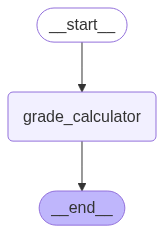

In [ ]:
# %%

# Display inline
display(Image(app.get_graph().draw_mermaid_png()))

# (Optional) save files
import os
os.makedirs("output", exist_ok=True)
with open("output/grade_calculator.png", "wb") as f:
    f.write(app.get_graph().draw_mermaid_png())
with open("output/grade_calculator.mmd", "w") as f:
    f.write(app.get_graph().draw_mermaid())

# %% [markdown]

 ## 6. Run the Graph with Sample Data

 Invoke the graph end‐to‐end with some example scores.

In [ ]:
# %%

sample_input = {
    "scores": [88.5, 92.0, 85.5, 94.0, 87.5],
    "student_name": "Alice Johnson",
    "course_name": "Python Programming"
}
result = app.invoke(sample_input)

# %% [markdown]

 ## 7. Show the Final Report

In [ ]:
# %%

print(result["grade_report"])

Student: Alice Johnson
Course : Python Programming
Scores : 88.5, 92.0, 85.5, 94.0, 87.5
Average: 89.50%
Final  : B
